In [18]:
# Automatic Rotation and good var_optim_threshold

In [19]:
%matplotlib inline

import imutils
import sys
import os
import numpy as np
import cv2
import copy
import math as mt
from math import sin, cos, radians, pi
from scipy.signal import find_peaks
from sympy import Point, Line, Symbol, pi
from skimage import draw
import matplotlib.pyplot as plt
import time
import math
from statistics import mode
import pandas as pd
from natsort import natsorted
from statistics import median

In [20]:
sys.path.insert(0, '/media/Work/Codes/Private/pdf417-decoder/code/python/new/src')
from barcode_detector import BarcodeDetector

In [21]:
THRESHOLD = 0.15

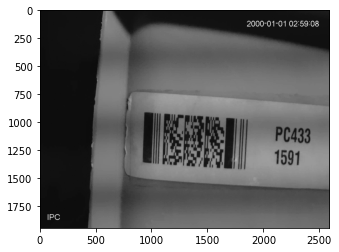

In [22]:
MODEL_PATH = '/media/Work/Codes/Private/pdf417-decoder/code/python/new/src/pdf417_model/PDF417_frozen_inference_graph_Gray_v1.pb'
# INPUT_PATH = 'in/IP_TVS_2020_04_21_00014.png'
INPUT_PATH = '/media/TrackDiagnostics/17-02-2021/19.00.00/19.52.49.032_9caa2942-712b-11eb-af87-4d7fc2377e80/InputStream/04.jpg'
# INPUT_PATH = 'in/IP_TVS_2020_04_21_00009_00016.png'
DETECTOR_OUTPUT_PATH = '/media/Work/Codes/Private/pdf417-decoder/code/python/new/out/Detection_Output.bmp'
CROP_PATH = '/media/Work/Codes/Private/pdf417-decoder/code/python/new/src/out/Crop_Output.bmp'
BIN_OUTPUT_PATH = '/media/Work/Codes/Private/pdf417-decoder/code/python/new/out/Bin_Output.bmp'

bd = BarcodeDetector(MODEL_PATH, 'GRAY')
image = cv2.imread(INPUT_PATH, 0)
plt.imshow(image, cmap='gray')

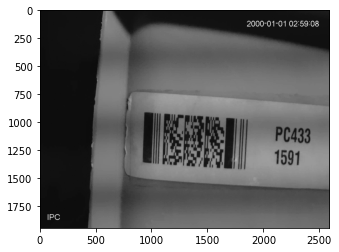

In [23]:
rows, cols = image.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),0,1)
rotated_image = cv2.warpAffine(image,M,(cols,rows), flags=cv2.INTER_LINEAR)


# rotated_image = imutils.rotate(image, 10)
plt.imshow(rotated_image, cmap='gray')

In [24]:
image = rotated_image

In [25]:
# custom_pdf417_decoder = custom_PDF417()
print(image.shape)

boxes = bd.predict(image)
detected_image = copy.deepcopy(image)
#
#
print(f'boxes: {boxes}')

def put_rectangle(img, bbox):
    return cv2.rectangle(img, (bbox[1], bbox[0]),
                         (bbox[3], bbox[2]), (0, 255, 0), 5)
#
#
for box in boxes:
    x1, y1, x2, y2 = list(map(int, box))
    new_image = image[x1:x2, y1:y2]
    cv2.imwrite(CROP_PATH, new_image)
    put_rectangle(detected_image, box)

(1944, 2592)


UnknownError: 2 root error(s) found.
  (0) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node import/FeatureExtractor/MobilenetV1/MobilenetV1/Conv2d_0/Conv2D (defined at /media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/tensorflow_core/python/framework/ops.py:1748) ]]
  (1) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node import/FeatureExtractor/MobilenetV1/MobilenetV1/Conv2d_0/Conv2D (defined at /media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/tensorflow_core/python/framework/ops.py:1748) ]]
	 [[import/Postprocessor/BatchMultiClassNonMaxSuppression/map/TensorArrayUnstack_6/range/_77]]
0 successful operations.
0 derived errors ignored.

Original stack trace for 'import/FeatureExtractor/MobilenetV1/MobilenetV1/Conv2d_0/Conv2D':
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 612, in start
    self.io_loop.start()
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/asyncio/base_events.py", line 442, in run_forever
    self._run_once()
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/asyncio/base_events.py", line 1462, in _run_once
    handle._run()
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/tornado/ioloop.py", line 688, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/tornado/ioloop.py", line 741, in _run_callback
    ret = callback()
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/tornado/gen.py", line 814, in inner
    self.ctx_run(self.run)
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/tornado/gen.py", line 162, in _fake_ctx_run
    return f(*args, **kw)
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/tornado/gen.py", line 775, in run
    yielded = self.gen.send(value)
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 381, in dispatch_queue
    yield self.process_one()
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/tornado/gen.py", line 250, in wrapper
    runner = Runner(ctx_run, result, future, yielded)
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/tornado/gen.py", line 741, in __init__
    self.ctx_run(self.run)
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/tornado/gen.py", line 162, in _fake_ctx_run
    return f(*args, **kw)
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/tornado/gen.py", line 775, in run
    yielded = self.gen.send(value)
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/tornado/gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/tornado/gen.py", line 162, in _fake_ctx_run
    return f(*args, **kw)
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/tornado/gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/tornado/gen.py", line 162, in _fake_ctx_run
    return f(*args, **kw)
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 545, in execute_request
    user_expressions, allow_stdin,
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/tornado/gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/tornado/gen.py", line 162, in _fake_ctx_run
    return f(*args, **kw)
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 306, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2867, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2895, in _run_cell
    return runner(coro)
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3072, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3263, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-22-3e58763e5e5c>", line 9, in <module>
    bd = BarcodeDetector(MODEL_PATH, 'GRAY')
  File "/media/Work/Codes/Private/pdf417-decoder/code/python/new/src/barcode_detector.py", line 20, in __init__
    super(BarcodeDetector, self).__init__(config=tfconfig)
  File "/media/Work/Codes/Private/pdf417-decoder/code/python/new/src/vap/models.py", line 69, in __init__
    tf.import_graph_def(self.graph_def, name=config.import_name)
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/tensorflow_core/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/tensorflow_core/python/framework/importer.py", line 405, in import_graph_def
    producer_op_list=producer_op_list)
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/tensorflow_core/python/framework/importer.py", line 517, in _import_graph_def_internal
    _ProcessNewOps(graph)
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/tensorflow_core/python/framework/importer.py", line 243, in _ProcessNewOps
    for new_op in graph._add_new_tf_operations(compute_devices=False):  # pylint: disable=protected-access
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/tensorflow_core/python/framework/ops.py", line 3561, in _add_new_tf_operations
    for c_op in c_api_util.new_tf_operations(self)
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/tensorflow_core/python/framework/ops.py", line 3561, in <listcomp>
    for c_op in c_api_util.new_tf_operations(self)
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/tensorflow_core/python/framework/ops.py", line 3451, in _create_op_from_tf_operation
    ret = Operation(c_op, self)
  File "/media/Work/Codes/Private/pdf417-decoder/env/pdf417/lib/python3.6/site-packages/tensorflow_core/python/framework/ops.py", line 1748, in __init__
    self._traceback = tf_stack.extract_stack()


In [ ]:
plt.imshow(detected_image, cmap='gray')

In [ ]:
input_image = new_image
# input_image = cv2.imread('/media/Work/Codes/Private/pdf417-decoder/code/python/new/src/out/Crop_Output.bmp', 0)
plt.imshow(input_image, cmap='gray')

In [ ]:
sharpening_filter = np.array([[-1, -1, -1], 
                              [-1, 9, -1], 
                              [-1, -1, -1]])
# sharpening_filter = np.array([[-1, -1, -1, -1, -1], 
#                               [-1, -1, -1, -1, -1], 
#                               [-1, -1, 25, -1, -1], 
#                               [-1, -1, -1, -1, -1],
#                               [-1, -1, -1, -1, -1]])
sharpened_image = cv2.filter2D(input_image, -1, sharpening_filter)
plt.imshow(sharpened_image, cmap='gray')

In [ ]:
# input_image = sharpened_image

In [ ]:
# # INPUT_IMAGE_PATH = '/media/Work/Codes/Private/pdf417-decoder/output/images/'\
# #                    'Crop/15-02-2021/17:00:00/15-02-2021_17:42:57:272_009/00031_1.bmp'

# INPUT_IMAGE_PATH = '/media/Work/Codes/Private/pdf417-decoder/code/python/new/src/out/Crop_Output.png'
# # INPUT_PATH = '/home/sandana/Documents/good_crops'
# # image_files = natsorted(os.listdir(INPUT_PATH))

# # INPUT_IMAGE_PATH = os.path.join(INPUT_PATH, image_files[10])
# print(f'INPUT_IMAGE_PATH: {INPUT_IMAGE_PATH}')
# input_image = cv2.imread(INPUT_IMAGE_PATH, 0)
# plt.imshow(input_image, cmap='gray')

In [ ]:
thresh1 = cv2.adaptiveThreshold(input_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                          cv2.THRESH_BINARY, 199, 5)
plt.imshow(thresh1, cmap='gray')
input_image=thresh1

In [ ]:
def convert_image(var_image):
    d = np.ndim(var_image)
    
    if d == 3:
        var_gray_img = cv2.cvtColor(var_image, cv2.COLOR_BGR2GRAY)
    else:
        var_gray_img = var_image
    
    return var_gray_img

converted_image = convert_image(input_image)
plt.imshow(converted_image, cmap='gray')

In [ ]:
def all_corners(var_gray_img, threshold=0.12):

    corners = cv2.goodFeaturesToTrack(var_gray_img, 1000, threshold, 10)
    var_all_corners = np.array(tuple(map(np.ravel, corners)), dtype=np.int0)
    
    return var_all_corners

var_all_corners = all_corners(converted_image)
var_all_corners.shape

In [ ]:
def image_corners(var_gray_img):
    '''Find corner indices of the Image'''

    row, col = var_gray_img.shape
    img_area = row * col
    var_image_corners = [[0, 0],
                          [col - 1, 0],
                          [col - 1, row - 1],
                          [0, row - 1]]

    return var_image_corners

var_image_corners = image_corners(converted_image)
var_image_corners

In [ ]:
def min_dist(point, points_array):
    '''Find the min distance between reference points with the points'''
    
    x1, y1 = point
    dist_arr = []
    for i in range(len(points_array)):
        x2, y2 = points_array[i]
        d = mt.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
        dist_arr.append(d)

    return min(dist_arr), np.argmin(dist_arr)


def distances(var_all_corners, var_image_corners):
    '''Find the distances of corners of the Barcode'''
    
    var_distances = [min_dist(point, var_all_corners) for point in var_image_corners]
    
    return var_distances


var_distances = distances(var_all_corners, var_image_corners)
var_distances

In [ ]:
def order_points(points):
    rect = np.zeros((4, 2), dtype="float32")

    s = points.sum(axis=1)
    rect[0] = points[np.argmin(s)]
    rect[2] = points[np.argmax(s)]

    diff = np.diff(points, axis=1)
    rect[1] = points[np.argmin(diff)]
    rect[3] = points[np.argmax(diff)]

    return rect

In [ ]:
def barcode_corners(var_all_corners, var_distances):
    '''Get Barcode corner co-ordinates'''

    var_barcode_corners = order_points(np.array([var_all_corners[
                                                               var_distances[i][1]]
                                                           for i in range(4)]))
    return var_barcode_corners

var_barcode_corners = barcode_corners(var_all_corners, var_distances)
var_barcode_corners

In [ ]:
def find_top_border_angle(var_barcode_corners):
    '''Find Angle of Top border'''
    
    P1 = var_barcode_corners[0][:]
    P2 = var_barcode_corners[1][:]

    top_line_angle = 90 - round(math.degrees(math.atan2((round(P1[0], 2) - 
                                                         round(P2[0], 2)), 
                                                        (round(P1[1], 2) - 
                                                         round(P2[1], 2)))))

    return top_line_angle

top_line_angle = find_top_border_angle(var_barcode_corners)
top_line_angle

In [ ]:
def point_angles(var_barcode_corners):
    '''Get Barcode corner co-ordinates'''
    
    points = list(map(Point, var_barcode_corners))

    var_angle_arr = []
    for i in range(len(points)):
        l1 = Line(points[i], points[i - 1])
        try:
            l2 = Line(points[i], points[i + 1])
        except:
            l2 = Line(points[i], points[-len(points)])

        angle = l1.angle_between(l2)
        var_angle_arr.append(float(angle * (180 / pi)))
    
    return var_angle_arr

var_angle_arr = point_angles(var_barcode_corners)
var_angle_arr

In [ ]:
def associated_pts(var_angle_arr):

    var_associat_pts = []
    angle_variance = []
    angle_diff = []
    for i in range(len(var_angle_arr)):
        if i:
            angles = [var_angle_arr[i], var_angle_arr[i - 1]]
            var_associat_pts.append([i, angles])
        else:
            angles = [var_angle_arr[i], var_angle_arr[-1]]
            var_associat_pts.append([i, angles])
        angle_variance.append([i, np.var(angles)])
        angle_diff.append
        
    return var_associat_pts, angle_variance

var_associat_pts, angle_variance = associated_pts(var_angle_arr)
print(f'var_associat_pts: {var_associat_pts}')
print(f'angle_variance: {angle_variance}')

In [ ]:
def vert_dist(var_barcode_corners, var_all_corners):

    p1, p2 = var_barcode_corners[:2]
    ppcular_dist = []
    for i in range(len(var_all_corners)):
        p3 = var_all_corners[i]
        d = abs(np.cross(p2 - p1, p3 - p1) / np.linalg.norm(p2 - p1))
        ppcular_dist.append(d)
    var_vert_dist = np.array(ppcular_dist)
    
    return var_vert_dist

var_vert_dist = vert_dist(var_barcode_corners, var_all_corners)
var_vert_dist.shape

In [ ]:
def sorted_distances(var_vert_dist):
    var_sorted_dist = np.sort(var_vert_dist)
    
    return var_sorted_dist

def distance_gradients(var_sorted_dist):
    var_dist_grad = np.gradient(var_sorted_dist)
    
    return var_dist_grad

def highest_peak(distance_gradients):
    var_highest_peak = np.max(distance_gradients)
    
    return var_highest_peak

def get_peaks(var_dist_grad, var_sorted_dist, var_highest_peak, height=0.5):

    peak_indices, peaks = find_peaks(var_dist_grad, height=height * var_highest_peak)
    peak_indices = np.append(peak_indices, len(var_sorted_dist))

    var_peak_indices, var_peaks = peak_indices, peaks['peak_heights']
    
    return var_peak_indices, var_peaks

var_sorted_dist = sorted_distances(var_vert_dist)
var_dist_grad = distance_gradients(var_sorted_dist)
var_highest_peak = highest_peak(var_dist_grad)

var_peak_indices, var_peaks = get_peaks(var_dist_grad, var_sorted_dist, var_highest_peak, height=0.7)
var_peak_indices

In [ ]:
def search_threshold(converted_image, in_threshold_arr=[0.15, 0.2, 0.25, 0.3, 0.35]):
    variance_data_arr = []
    peaks_data_arr = []
    out_threshold_arr = []
    
    present_flag = False

    for threshold in in_threshold_arr:

        try:
            # print(threshold_arr)
            print(threshold)
            var_all_corners = all_corners(converted_image, threshold=threshold)
            var_image_corners = image_corners(converted_image)
            var_distances = distances(var_all_corners, var_image_corners)
            var_barcode_corners = barcode_corners(var_all_corners, var_distances)
            top_line_angle = find_top_border_angle(var_barcode_corners)
            var_angle_arr = point_angles(var_barcode_corners)
            var_associat_pts, angle_variance = associated_pts(var_angle_arr)
            var_vert_dist = vert_dist(var_barcode_corners, var_all_corners)
            print(1)
            
            
            var_sorted_dist = sorted_distances(var_vert_dist)
            var_dist_grad = distance_gradients(var_sorted_dist)
            var_highest_peak = highest_peak(var_dist_grad)
            
            peak_indices, peaks = get_peaks(var_dist_grad, var_sorted_dist, var_highest_peak, height=0.4)
            print(2)
            variance_data = [np.var(peaks), np.var(np.gradient(peak_indices[:-1]))]
            print(f'peaks: {peak_indices}')
            print(f'len(peaks): {len(peaks)}')
            print(f'peaks_diff: {np.diff(np.array(sorted(peaks)))}')
            peaks_data_arr.append(peaks)
            variance_data_arr.append(variance_data)
            out_threshold_arr.append(threshold)
            present_flag = True
            
        except:
            pass

    if present_flag:
        variance_data_arr = np.transpose(variance_data_arr)
        peaks_data_arr = peaks_data_arr

    else:
        variance_data_arr = np.array([])
        peaks_data_arr = np.array([])
    
    return out_threshold_arr, peaks_data_arr, variance_data_arr

start = time.time()
threshold_arr, peaks_data_arr, variance_data_arr = search_threshold(converted_image)
print(f'Time Duration: {time.time() - start}')

print(f'threshold_arr: {threshold_arr}')
print(f'peaks_data_arr: {peaks_data_arr}')
print(f'variance_data_arr: {variance_data_arr}')

In [ ]:
def optim_threshold(threshold_arr, peaks_data, variance_data):
    var_optim_threshold = None
    save_var = {'variance': variance_data, 'peaks': peaks_data}
    
    good_heights = []
    if len(peaks_data):
        print(f'[max(peak) for peak in peaks_data]: {[max(peak) for peak in peaks_data]}')
        max_peak_list = [max(peak) for peak in peaks_data]
        
        sizes = []
        for max_peak, peaks_list in zip(max_peak_list, peaks_data):
            cap = 0.5 * max_peak

            print(f'max_peak: {max_peak}')
            print(f'peaks_list: {peaks_list}')
            mask = peaks_list  >= cap
            size = len(peaks_list)
            sizes.append(size)
        
            print(f'mask: {mask}')
            print(f'size: {size}')

            good_height = np.count_nonzero(mask) == size
            print(f'good_height: {good_height}')
            
            good_heights.append(good_height)

        order = variance_data.argsort()
        ranks = order.argsort()
        total_variance = np.var(ranks, axis=0)
        weighted_ranks = np.sum(ranks, axis=0)
        cum_ranks = np.sum([total_variance, weighted_ranks], axis=0)
        print(f'variance_data: {variance_data}')
        print(f'total_variance: {total_variance}')
        print(f'cum_ranks: {cum_ranks}')
        
        index = np.argmin(cum_ranks)
        
        print(f'good_heights: {good_heights}')
        print(f'index: {index}')

        indices = [i for i, j in enumerate(sizes) if j==max(sizes)]
#       index = sizes.index(max(sizes))
        print(f'indices: {indices}')

        good_indices = [index for index in indices if good_heights[index]]
        
        if len(good_indices):
            index = int(median(good_indices))
            var_optim_threshold = threshold_arr[index]
                
    print(f'var_optim_threshold: {var_optim_threshold}')
    return var_optim_threshold

start = time.time()
var_optim_threshold = optim_threshold(threshold_arr, peaks_data_arr, variance_data_arr)

print(f'Time taken: {time.time() - start}')
print(f'var_optim_threshold: {var_optim_threshold}')

In [ ]:
def class_centers(var_peak_indices):
    '''To calculate centroids by averaging distance measures between peaks'''

    centroids = []
    for i in range(len(var_peak_indices)):
        if i == 0:
            min_idx = 0
            max_idx = var_peak_indices[i]
        elif i == len(var_peak_indices) - 1:
            min_idx = var_peak_indices[i - 1]
            max_idx = len(var_sorted_dist)
        else:
            min_idx = var_peak_indices[i - 1]
            max_idx = var_peak_indices[i]

        centroids.append(np.mean(var_sorted_dist[min_idx: max_idx]))

    return centroids


# var_all_corners = all_corners(converted_image, threshold=var_optim_threshold)
var_all_corners = all_corners(converted_image, threshold=THRESHOLD)
var_image_corners = image_corners(converted_image)
var_distances = distances(var_all_corners, var_image_corners)
var_barcode_corners = barcode_corners(var_all_corners, var_distances)
top_line_angle = find_top_border_angle(var_barcode_corners)
var_angle_arr = point_angles(var_barcode_corners)
var_associat_pts, angle_variance = associated_pts(var_angle_arr)
var_vert_dist = vert_dist(var_barcode_corners, var_all_corners)

var_sorted_dist = sorted_distances(var_vert_dist)
var_dist_grad = distance_gradients(var_sorted_dist)
var_highest_peak = highest_peak(var_dist_grad)

var_peak_indices, var_peaks = get_peaks(var_dist_grad, var_sorted_dist, var_highest_peak, height=0.51)
centroids = class_centers(var_peak_indices)
diff = np.diff(np.array(centroids)).tolist()
len(centroids)

In [ ]:
def labels(var_vert_dist, var_sorted_dist, var_peak_indices):
    '''To get the labels of the co-ordinates with centroids as reference'''

    labels = copy.deepcopy(var_vert_dist)
    for i in range(len(var_peak_indices)):
        if i == 0:
            min_idx = 0
            max_idx = var_peak_indices[i]
        elif i == len(var_peak_indices) - 1:
            min_idx = var_peak_indices[i - 1]
            max_idx = len(var_sorted_dist) - 1
        else:
            min_idx = var_peak_indices[i - 1]
            max_idx = var_peak_indices[i]

        if i != len(var_peak_indices) - 1:
            labels[np.where((var_vert_dist < var_sorted_dist[max_idx]) &
                            (var_vert_dist >= var_sorted_dist[min_idx]))] = i
        else:
            labels[np.where((var_vert_dist <= var_sorted_dist[max_idx]) &
                            (var_vert_dist >= var_sorted_dist[min_idx]))] = i

    var_labels = labels.astype(int)
    
    return var_labels

var_labels = labels(var_vert_dist, var_sorted_dist, var_peak_indices)

var_labels1 = pd.Series(var_labels)
list(var_labels1.groupby(var_labels1).count())
np.var(var_labels1)

In [ ]:
def center_coordinates(var_labels):
    '''Find the centroid of the coordinates'''

    var_center_coord = []
    concur_feat_sep = []
    coords = var_all_corners
    
    for i in range(len(np.unique(var_labels))):
        selected_bin = coords[np.where(var_labels == i)]
        centroid = np.mean(selected_bin, axis=0)
        var_center_coord.append(centroid)
        concur_feat_sep.append(centroid.astype('int'))
    
    return var_center_coord, concur_feat_sep


var_center_coord, int_var_center_coord = center_coordinates(var_labels)

print(f'\nvar_center_coord: {var_center_coord}\n')
print(f'\int_var_center_coord: {int_var_center_coord}\n')

In [ ]:
# def concurrent_feature_sep(var_center_coord, var_barcode_corners):

#     start = time.time()
#     (p1, p2) = var_barcode_corners[:2]
#     top_border = Line(Point(p1), Point(p2))
#     mid_point = Point(p1).midpoint(Point(p2))
#     ppcular_line = top_border.perpendicular_line(mid_point)
#     tap1 = time.time()
#     print(f'Time1: {tap1 - start}')
    
#     collect_feature_sep = []
#     for centroid in var_center_coord:
#         parallel_line = top_border.parallel_line(centroid)
#         feature_sep = ppcular_line.intersection(parallel_line)
#         collect_feature_sep.append(feature_sep[0])

#     var_concur_feat_sep = collect_feature_sep
#     print(f'Time2: {time.time() - tap1}')
    
#     return var_concur_feat_sep, ppcular_line

In [ ]:
def concurrent_feature_sep(var_center_coord, var_barcode_corners):

    start = time.time()
    (p1, p2) = var_barcode_corners[:2]
    top_border = Line(Point(p1), Point(p2))
    mid_point = Point(p1).midpoint(Point(p2))
    ppcular_line = top_border.perpendicular_line(mid_point)
    tap1 = time.time()
    print(f'Time1: {tap1 - start}')
    a, b, c = ppcular_line.coefficients
    
    collect_feature_sep = []
    for centroid in var_center_coord:
        parallel_line = top_border.parallel_line(centroid)
        feature_sep = ppcular_line.intersection(parallel_line)
        collect_feature_sep.append(feature_sep[0])

    var_concur_feat_sep = collect_feature_sep
    print(f'Time2: {time.time() - tap1}')
    
    return var_concur_feat_sep

start = time.time()
var_concur_feat_sep = concurrent_feature_sep(var_center_coord, var_barcode_corners)
tap2 = time.time()
print(f'Time2: {tap2 - start}')

def get_coord_dist(var_concur_feat_sep):
    dist_arr = []
    for p1, p2 in zip(var_concur_feat_sep, var_concur_feat_sep[1:]):
        dist_arr.append(p1.distance(p2))
        
    return dist_arr

dist_arr = get_coord_dist(var_concur_feat_sep)
tap3 = time.time()
print(f'Time2: {tap3 - tap2}')
dist_arr

In [ ]:
def overlay_corners(image, corners, radius, color, inplace=False):
    if not inplace:
        overlaid_image = copy.deepcopy(image)
    else:
        overlaid_image = image

    corners = tuple(map(tuple, corners))
    for corner in corners:
        cv2.circle(overlaid_image, corner, radius, color, -1)
    return overlaid_image


def overlay_lines(image, start, end, line_thickness, line_color, inplace=False):
    if not inplace:
        overlaid_image = copy.deepcopy(image)
    else:
        overlaid_image = image

    start, end = tuple(map(tuple, start)), tuple(map(tuple, end))
    for start_line, end_line in zip(start, end):
        cv2.line(overlaid_image, start_line, end_line, line_color, line_thickness)
    
    return overlaid_image

print()
debug_image = cv2.merge((input_image, input_image, input_image))
debug_image = overlay_corners(debug_image, var_barcode_corners, 10, (0, 255, 0), inplace=True)
debug_image = overlay_corners(debug_image, var_all_corners, 5, (0, 0, 255), inplace=True)
debug_image = overlay_corners(debug_image, int_var_center_coord, 5, (255, 0, 0), inplace=True)
plt.imshow(debug_image)

In [ ]:
var_optim_threshold

In [ ]:
def line_count(int_var_center_coord, req_line_cnt):

    line_count = req_line_cnt
    (p1, p2) = int_var_center_coord[:2]
    (x, y), (s, t) = p1, p2
    d8 = max(abs(x - s), abs(y - t))
#     print(f'd8: {d8}')
    
    if line_count > (d8 / 2.2):
        line_count = int(d8 / 2.2)
    else:
        line_count += 1
        
#     print(f'line_count: {line_count}')
    var_norm_distance = 1 / line_count
    var_line_count = line_count - 1
    
    return var_line_count, var_norm_distance

var_line_count, var_norm_distance = line_count(int_var_center_coord, 3)

print(f'var_line_count: {var_line_count}')
print(f'var_norm_distance: {var_norm_distance}')

In [ ]:
def line_prof(var_image_corners, var_center_coord, top_line_angle):
    line_prof_coor_arr = []
    y_borderpoints = var_image_corners[-1]
    x_borderpoints = var_image_corners[1]
    
    print(f'y_borderpoints: {y_borderpoints}')
    print(f'x_borderpoints: {x_borderpoints}')
    
    max_line_length = 20000
    
    x_angle = math.cos(top_line_angle * pi / 180.0)
    y_angle = math.sin(top_line_angle * pi / 180.0)

    print(f'x_angle: {x_angle}')
    print(f'y_angle: {y_angle}')
    
    for i in range(len(var_center_coord)):
        P1x, P1y = var_center_coord[i][0], var_center_coord[i][1]
        P1x = int(P1x)
        P1y = int(P1y)            
        
        for j in range(max_line_length):
            P2x = int(round(P1x - j * x_angle))
            P2y = int(round(P1y - j * y_angle))
            
            if P2x in x_borderpoints or P2y in y_borderpoints:
                break
        
        for j in range(max_line_length):
            P3x = int(round(P1x + j * x_angle))
            P3y = int(round(P1y + j * y_angle))
            
            if P3x in x_borderpoints or P3y in y_borderpoints:
                break
                
            line_prof_coor_arr.append([(P3x, P3y), (P2x, P2y)])
    line_prof_coor_np_arr = np.asarray(line_prof_coor_arr)
    
    return line_prof_coor_np_arr

print(f'var_image_corners: {var_image_corners}')
print(f'top_line_angle: {top_line_angle}')
print(f'var_center_coord: {len(var_center_coord)}')

line_prof_coor_arr = line_prof(var_image_corners, var_center_coord, top_line_angle)
line_prof_coor_arr

In [ ]:
def row_extraction(var_gray_img, var_image_corners, top_line_angle, var_center_coord, req_line_cnt=3):

    # start_t = time.time()
    Int_prof_points = []
    req_line_cnt = req_line_cnt / 2
    y_borderpoints = var_image_corners[-1]
    x_borderpoints = var_image_corners[1]
    max_line_length = 20000
    x_angle = math.cos(top_line_angle * pi / 180.0)
    y_angle = math.sin(top_line_angle * pi / 180.0)
    int_prof = []
    dup_check = []

    for i in range(len(var_center_coord) - 1):

        start = int(var_center_coord[i][1])
        end = int(var_center_coord[i + 1][1])

        length = (end - start) / 2
        need_row = np.arange(length - math.floor(req_line_cnt), length + math.ceil(req_line_cnt))
        data_arr = []

        for k in need_row:
            P1x, P1y = var_center_coord[i][0], var_center_coord[i][1] + k
            P1x = int(P1x)
            P1y = int(P1y)
            right_line_prof = []
            for j in range(max_line_length):
                P2x = int(round(P1x - j * x_angle))
                P2y = int(round(P1y - j * y_angle))
                if P2x in x_borderpoints or P2y in y_borderpoints:
                    break
                if len(right_line_prof) >= 1:
                    if [P2y, P2x] != dup_check[-1]:
                        right_line_prof.append(var_gray_img[P2y, P2x])
                else:
                    right_line_prof.append(var_gray_img[P2y, P2x])
                dup_check = [[P2y, P2x]]

            left_line_prof = []
            for j in range(max_line_length):
                P3x = int(round(P1x + j * x_angle))
                P3y = int(round(P1y + j * y_angle))
                if P3x in x_borderpoints or P3y in y_borderpoints:
                    break
                if len(left_line_prof) >= 1:
                    if [P3y, P3x] != dup_check[-1]:
                        left_line_prof.append(var_gray_img[P3y, P3x])
                else:
                    left_line_prof.append(var_gray_img[P3y, P3x])
                dup_check = [[P3y, P3x]]
            Int_prof_points.append([(P3x, P3y), (P2x, P2y)])
            left_line_prof.reverse()
            data = left_line_prof + right_line_prof
            data_arr.append(data)

        int_prof.extend(data_arr)

    # print('Int_profile_time : ',time.time()-start_t)
    Int_prof_points = np.asarray(Int_prof_points)
    
    return int_prof, Int_prof_points

int_prof, Int_prof_points = row_extraction(converted_image, 
                                           var_image_corners, 
                                           top_line_angle, 
                                           var_center_coord, req_line_cnt=3)
np.array(int_prof).shape

In [ ]:
def debug_image(var_image, var_all_corners, var_barcode_corners, concur_feat_sep, line_prof_coor_arr):

    debug_img = copy.deepcopy(var_image)

    if not debug_img.ndim == 3:
        debug_img = np.stack((debug_img,) * 3, axis=-1)

    pt1_thickness, pt1_color = 4, (255, 0, 0)
    pt2_thickness, pt2_color = 15, (0, 0, 255)
    pt3_thickness, pt3_color = 7, (0, 0, 255)
    l1_thickness, l1_color = 1, (0, 0, 255)
    l2_thickness, l2_color = 1, (0, 255, 0)

    left_coord_arr = Int_prof_points[:, 0]
    right_coord_arr = Int_prof_points[:, 1]
    debug_img = overlay_corners(debug_img, var_all_corners, pt1_thickness, pt1_color)
    debug_img = overlay_corners(debug_img, var_barcode_corners, pt2_thickness, pt2_color)
    debug_img = overlay_corners(debug_img, concur_feat_sep, pt3_thickness, pt3_color)
    debug_img = overlay_lines(debug_img, line_prof_coor_arr[:, 0], line_prof_coor_arr[:, 1],
                                   l1_thickness, l1_color)
    debug_img = overlay_lines(debug_img, left_coord_arr, right_coord_arr, l2_thickness, l2_color)
    
    return debug_img


debug_image = debug_image(input_image, var_all_corners, var_barcode_corners, int_var_center_coord, line_prof_coor_arr)
plt.imshow(debug_image)

In [ ]:
print(np.array(int_prof).shape, var_optim_threshold)

In [ ]:
np.diff(np.array(sorted(list(map(int, dist_arr))[1:])))

In [ ]:
def plot_int_profile(self):

    data = var_int_prof_arr
    fig_arr = []
    for i in range(len(data)):
        fig, ax = plt.subplots()
        for j in range(len(data[i])):
            elem_data = data[i][j]
            ax.plot(range(elem_data.shape[0]), elem_data, label='Line ' + str(j + 1))
        ax.legend()
        fig_arr.append(fig)
        
    return fig_arr

def plot_gradient(self):
    '''Visualization of height of each step'''

    x = np.arange(len(var_dist_grad))
    y = var_dist_grad
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.plot(x, y)
    plt.title('Peaks Graph')
    
    return fig